In [68]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [69]:
# Set your username and token here!
username = 'shreyajo'
token = '6cfe8f04b5424355'

# Set the datastream and start/enddates
datastream = 'bnfaoscaps3wM1.b1'
startdate = '2025-05-08'
enddate = '2025-05-11T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_caps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaossmpsM1.b1'
result_smps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaosnephdryM1.b1'
result_neph = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)


[DOWNLOADING] bnfaoscaps3wM1.b1.20250509.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250511.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250510.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250508.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Sedlacek, A., & Smith, S. Cavity Attenuated Phase Shift Extinction
Monitor (AOSCAPS3W), 2025-05-08 to 2025-05-11, Bankhead National Forest, AL,
USA; Long-term Mobile Facility (BNF), Bankhead National Forest, AL, AMF3 (Main
Site) (M1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1406888

[DOWNLOADING] bnfaossmpsM1.b1.20250511.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250509.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250510.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250508.000459.nc

If you use these data to prepare a publication, please cite:

Kuang, C., Singh, A., Howie, J., Salwen, C., & Hayes, C. Scanning mobility
particle sizer (AOSSMPS), 2025-05-08 to 2025-05-11, Bankhead Nat

In [70]:
# Let's read in the data using ACT and check out the data
ds_caps = act.io.read_arm_netcdf(result_caps)
ds_smps = act.io.read_arm_netcdf(result_smps)
ds_neph = act.io.read_arm_netcdf(result_neph)


ds_caps

<xarray.Dataset> Size: 46MB
Dimensions:                   (time: 345551)
Coordinates:
  * time                      (time) datetime64[ns] 3MB 2025-05-08T00:00:00.7...
Data variables: (12/27)
    base_time                 (time) datetime64[ns] 3MB 2025-05-08 ... 2025-0...
    time_offset               (time) datetime64[ns] 3MB 2025-05-08T00:00:00.7...
    Bext_R                    (time) float32 1MB dask.array<chunksize=(86385,), meta=np.ndarray>
    qc_Bext_R                 (time) int32 1MB dask.array<chunksize=(86385,), meta=np.ndarray>
    raw_loss_R                (time) float32 1MB dask.array<chunksize=(86385,), meta=np.ndarray>
    signal_R                  (time) float32 1MB dask.array<chunksize=(86385,), meta=np.ndarray>
    ...                        ...
    seconds_after_transition  (time) float64 3MB dask.array<chunksize=(86385,), meta=np.ndarray>
    impactor_state            (time) float64 3MB dask.array<chunksize=(86385,), meta=np.ndarray>
    qc_impactor_state         (time) int32 1MB dask.array<chunksize=(86385,), meta=np.ndarray>
    lat                       (time) float32 1MB 34.34 34.34 ... 34.34 34.34
    lon                       (time) float32 1MB -87.34 -87.34 ... -87.34 -87.34
    alt                       (time) float32 1MB 293.0 293.0 ... 293.0 293.0
Attributes: (12/18)
    command_line:          aoscaps3wcorr -s bnf -f M1 --max-runtime 0
    Conventions:           ARM-1.2
    process_version:       ingest-aoscaps3wcorr-1.2-1.el9
    dod_version:           aoscaps3w-b1-1.2
    input_source:          /data/collection/bnf/bnfaoscaps3wM1.00/bnfaosM1.ca...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1406888
    history:               created by user armflowprod on machine prod-slurmn...
    _file_dates:           ['20250508', '20250509', '20250510', '20250511']
    _file_times:           ['000000', '000000', '000000', '000000']
    _datastream:           bnfaoscaps3wM1.b1
    _arm_standards_flag:   1

<Axes: title={'center': 'SMPS dN_dlogDp on 20250508'}, xlabel='Time [UTC]', ylabel='(nm)'>

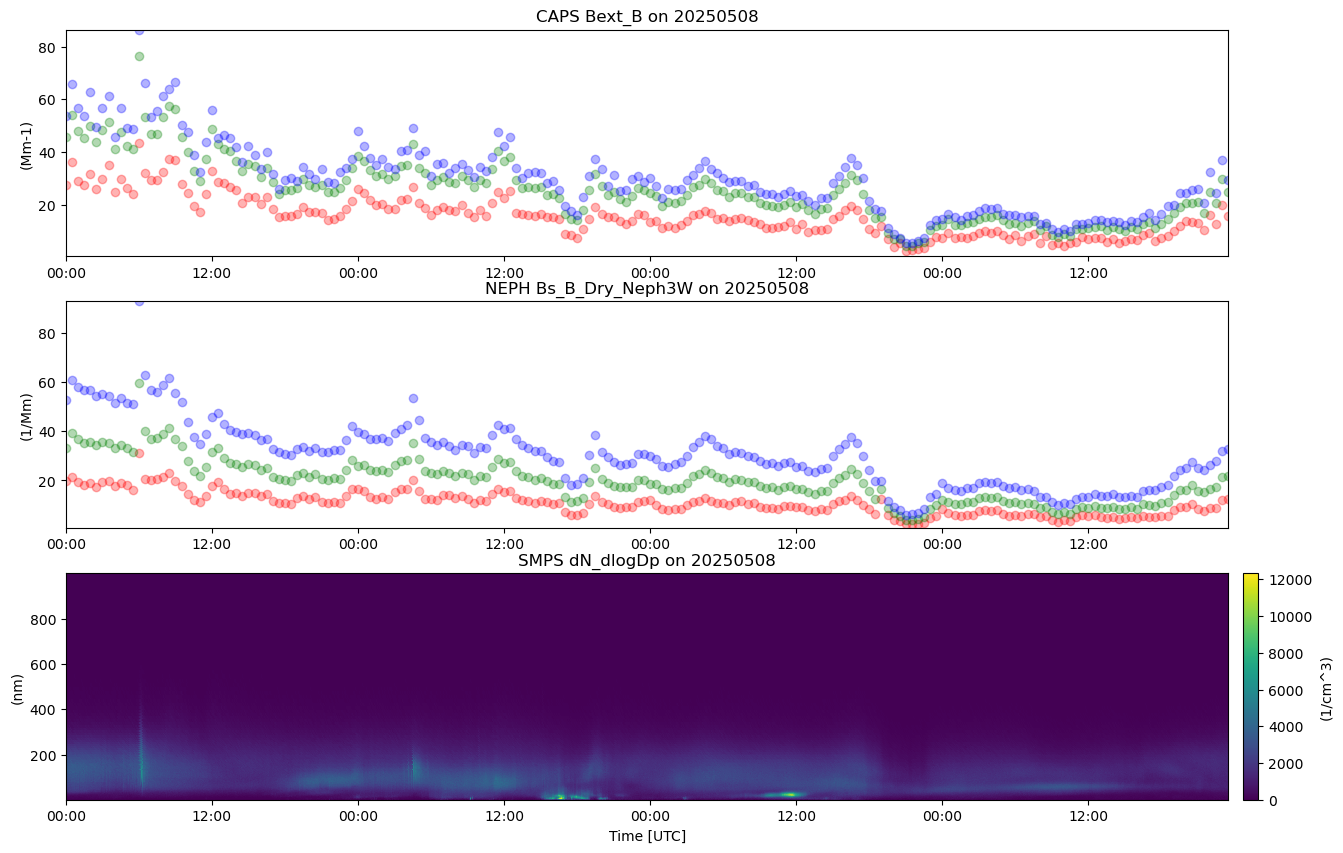

In [87]:
#And plot again!
# Create a plotting display object with 2 plots
# Note we have to create a dictionary of datasets to pass in
ds_caps=ds_caps.resample(time='10min').mean()
ds_neph=ds_neph.resample(time='10min').mean()


display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps, 'NEPH':ds_neph,'SMPS': ds_smps }, figsize=(15, 10), subplot_shape=(3,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=0.3)


display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=0.3)

# Plot up the MET btemperature and precipitation
display.plot('dN_dlogDp', dsname='SMPS', subplot_index=(2,))

In [88]:
dfNeph=ds_neph.to_dataframe()
dfCaps=ds_caps.to_dataframe()



In [89]:
import pandas as pd
df_merged = pd.merge_asof(dfNeph, dfCaps, on='time', direction='nearest')

In [90]:
df_merged['SSA B']=df_merged['Bs_B_Dry_Neph3W']/df_merged['Bext_B']
df_merged['SSA R']=df_merged['Bs_R_Dry_Neph3W']/df_merged['Bext_R']
df_merged['SSA G']=df_merged['Bs_G_Dry_Neph3W']/df_merged['Bext_G']

In [91]:
dfNeph

,Bs_B_Dry_Neph3W,qc_Bs_B_Dry_Neph3W,Bs_G_Dry_Neph3W,qc_Bs_G_Dry_Neph3W,Bs_R_Dry_Neph3W,qc_Bs_R_Dry_Neph3W,Bbs_B_Dry_Neph3W,qc_Bbs_B_Dry_Neph3W,Bbs_G_Dry_Neph3W,qc_Bbs_G_Dry_Neph3W,...,instrument_state,lamp_voltage,lamp_current,seconds_after_transition,impactor_state,qc_impactor_state,density_correction_factor,lat,lon,alt
time,,,,,,,,,,,,,,,,,,,,,
2025-05-08 00:00:00,52.802750,15157.214485,33.129543,15157.214485,19.717165,15157.214485,9.962007,15157.214485,6.947972,15157.214485,...,0.0,12.899443,5.900002,1006.979362,7.743733,8.027855,1.149685,34.342525,-87.33799,293.0
2025-05-08 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-08 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-08 00:30:00,60.885952,0.000000,39.396244,0.000000,21.570173,0.000000,8.065961,0.000000,6.529101,0.000000,...,0.0,12.897777,5.899724,1799.513044,10.000000,0.000000,1.144873,34.342525,-87.33799,293.0
2025-05-08 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-11 22:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-11 23:00:00,32.097336,8.088889,21.217714,8.088889,12.091530,8.088889,3.854406,8.088889,3.066747,8.088889,...,0.0,12.899444,5.854723,338.041594,7.750000,13.800000,1.152028,34.342525,-87.33799,293.0
2025-05-11 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='time'>

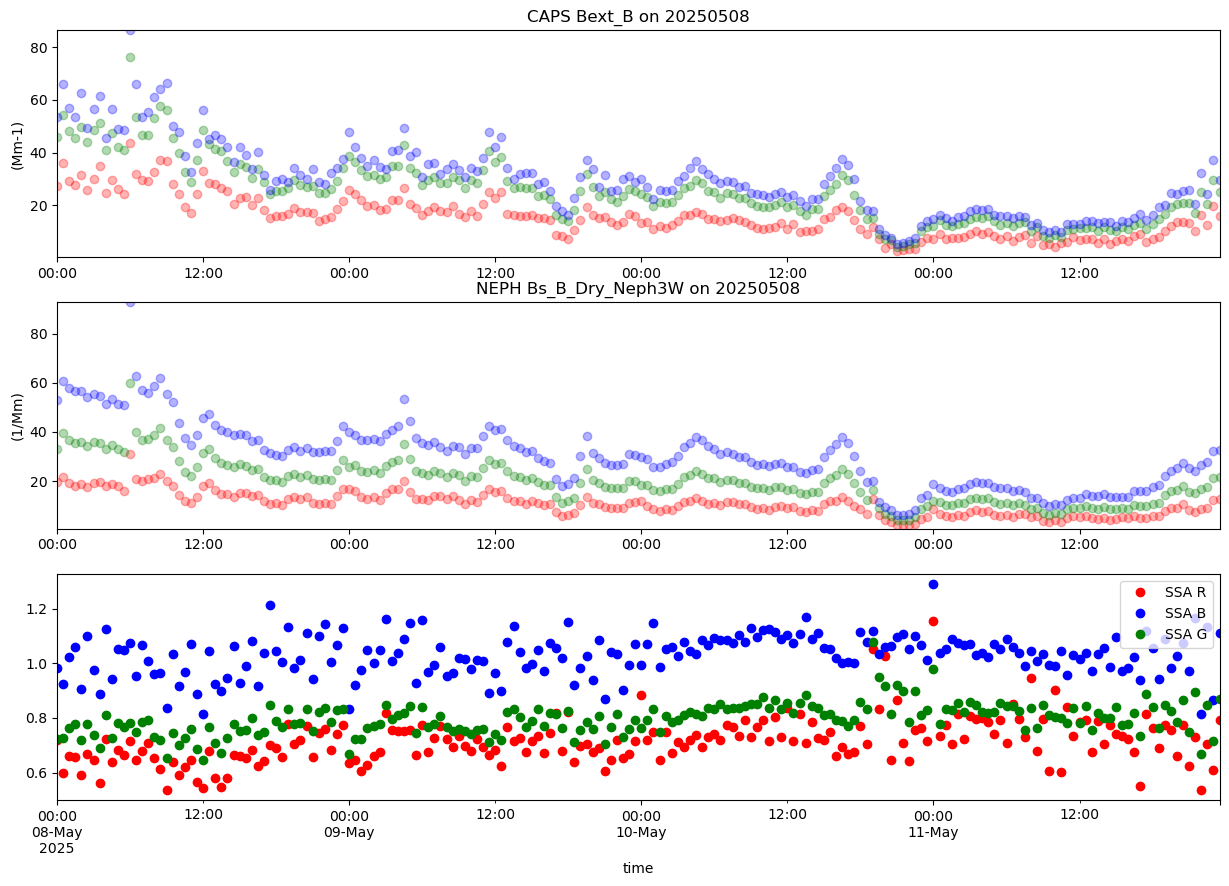

In [85]:
#And plot again!
# Create a plotting display object with 2 plots
# Note we have to create a dictionary of datasets to pass in
ds_caps=ds_caps.resample(time='30min').mean()
ds_neph=ds_neph.resample(time='30min').mean()

display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps, 'NEPH':ds_neph,'SSA': ds_smps }, figsize=(15, 10), subplot_shape=(3,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=0.3)

display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=0.3)

#display.axes[2,].plot(df_merged['time'],df_merged['SSA R'], color='red',marker='o', linestyle='none',alpha=0.3)
#display.axes[2,].plot(df_merged['time'],df_merged['SSA G'],color='green',marker='o', linestyle='none',alpha=0.3)
#display.axes[2,].plot(df_merged['time'],df_merged['SSA B'],color='blue',marker='o', linestyle='none',alpha=0.3)

df_merged.plot(x='time',y='SSA R',ax=display.axes[2,],color='red',style='o')
df_merged.plot(x='time',y='SSA B',ax=display.axes[2,],color='blue',style='o')
df_merged.plot(x='time',y='SSA G',ax=display.axes[2,],color='green',style='o')
display.axes[2,].set_ylabel('SSA')


In [86]:
display.axes[2,].set_ylabel('SSA')

Text(19.62500000000002, 0.5, 'SSA')

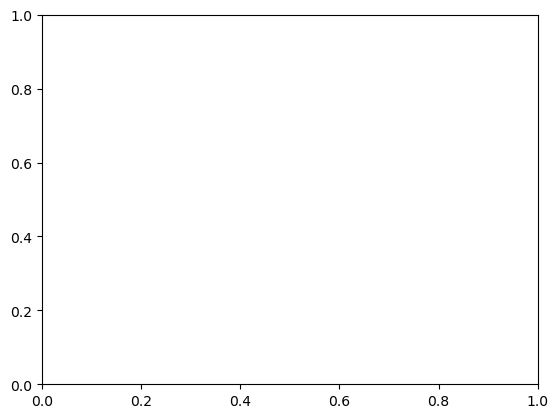

In [78]:
x=display.add_subplots()

In [79]:
x
